In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import datetime
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

# Gestión datos desbalanceados
# ------------------------------------------------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [2]:
df2 = pd.read_csv("./Datos/tiempo.csv", index_col=0)
df2

,index,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,16,1/1/2012 16:00,2.6,-0.2,82,13,12.9,99.93,Mostly Cloudy
1,26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,101.14,Mostly Cloudy
2,27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,101.14,Mostly Cloudy
3,28,1/2/2012 4:00,2.9,-2.3,69,32,25.0,101.14,Mostly Cloudy
4,29,1/2/2012 5:00,2.6,-2.3,70,32,25.0,101.14,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...
4170,8755,12/30/2012 19:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
4171,8757,12/30/2012 21:00,-13.8,-16.5,80,20,25.0,101.50,Mainly Clear
4172,8758,12/30/2012 22:00,-13.7,-16.3,81,19,25.0,101.54,Mainly Clear
4173,8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


 - Estandarizar las variables numéricas de vuestro set de datos

 - Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no

 - Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.

 - Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección

In [3]:
# nos hacemos una copia del df que acabamos de cargar

df_copia = df2.copy()

In [4]:
# iniciamos el método para escalar

scaler = StandardScaler()

In [5]:
# recordemos que la estandarización solo se hace para las variables predictoras numéricas

numericas = df_copia.select_dtypes(include = np.number)
numericas.head()

,index,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,16,2.6,-0.2,82,13,12.9,99.93
1,26,3.9,-0.9,71,32,25.0,101.14
2,27,3.7,-1.5,69,33,25.0,101.14
3,28,2.9,-2.3,69,32,25.0,101.14
4,29,2.6,-2.3,70,32,25.0,101.14


In [6]:
numericas.drop(["index"], axis = 1, inplace = True)

Estandarizamos las variables numéricas de vuestro set de datos

In [7]:
# ahora ya podemos ajustar nuestros datos.  

scaler.fit(numericas)

# transformamos los datos

X_escaladas = scaler.transform(numericas)

# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.782197
1,-0.645784,-0.430150,0.616199,2.334455,-0.673565,0.024563


In [8]:
# dropeamos las columnas sin estandarizar

df_copia.drop(["Temp_C", "Dew Point Temp_C", "Rel Hum_%", "Wind Speed_km/h", "Visibility_km", "Press_kPa"], axis = 1, inplace=True)
df_copia.head()

,index,Date/Time,Weather
0,16,1/1/2012 16:00,Mostly Cloudy
1,26,1/2/2012 2:00,Mostly Cloudy
2,27,1/2/2012 3:00,Mostly Cloudy
3,28,1/2/2012 4:00,Mostly Cloudy
4,29,1/2/2012 5:00,Mostly Cloudy


In [9]:
numericas_estandar

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.782197
1,-0.645784,-0.430150,0.616199,2.334455,-0.673565,0.024563
2,-0.662611,-0.484338,0.488112,2.467921,-0.673565,0.024563
3,-0.729921,-0.556589,0.488112,2.334455,-0.673565,0.024563
4,-0.755162,-0.556589,0.552155,2.334455,-0.673565,0.024563
...,...,...,...,...,...,...
4170,-2.101351,-1.839042,1.000461,1.533659,-0.673565,0.517316
4171,-2.135006,-1.839042,1.192591,0.732864,-0.673565,0.562112
4172,-2.126592,-1.820979,1.256635,0.599398,-0.673565,0.621840
4173,-1.991973,-1.712603,1.064504,1.800591,-0.673565,0.591976


In [10]:
# lo unimos al dataframe original 

df_copia = pd.concat([df_copia,numericas_estandar], axis = 1)
# chequeamos que esta todo bien
df_copia

,index,Date/Time,Weather,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,16,1/1/2012 16:00,Mostly Cloudy,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.782197
1,26,1/2/2012 2:00,Mostly Cloudy,-0.645784,-0.430150,0.616199,2.334455,-0.673565,0.024563
2,27,1/2/2012 3:00,Mostly Cloudy,-0.662611,-0.484338,0.488112,2.467921,-0.673565,0.024563
3,28,1/2/2012 4:00,Mostly Cloudy,-0.729921,-0.556589,0.488112,2.334455,-0.673565,0.024563
4,29,1/2/2012 5:00,Mostly Cloudy,-0.755162,-0.556589,0.552155,2.334455,-0.673565,0.024563
...,...,...,...,...,...,...,...,...,...
4170,8755,12/30/2012 19:00,Mainly Clear,-2.101351,-1.839042,1.000461,1.533659,-0.673565,0.517316
4171,8757,12/30/2012 21:00,Mainly Clear,-2.135006,-1.839042,1.192591,0.732864,-0.673565,0.562112
4172,8758,12/30/2012 22:00,Mainly Clear,-2.126592,-1.820979,1.256635,0.599398,-0.673565,0.621840
4173,8759,12/30/2012 23:00,Mostly Cloudy,-1.991973,-1.712603,1.064504,1.800591,-0.673565,0.591976


Codificamos las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no

In [11]:
df_copia.head(2)

,index,Date/Time,Weather,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,16,1/1/2012 16:00,Mostly Cloudy,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.782197
1,26,1/2/2012 2:00,Mostly Cloudy,-0.645784,-0.430150,0.616199,2.334455,-0.673565,0.024563


In [12]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4174
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             4175 non-null   int64  
 1   Date/Time         4175 non-null   object 
 2   Weather           4175 non-null   object 
 3   Temp_C            4175 non-null   float64
 4   Dew Point Temp_C  4175 non-null   float64
 5   Rel Hum_%         4175 non-null   float64
 6   Wind Speed_km/h   4175 non-null   float64
 7   Visibility_km     4175 non-null   float64
 8   Press_kPa         4175 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 326.2+ KB


Variables categóricas

Weather (No tiene Orden). Es nuestra variable respuesta.

Empezamos con "Weather" que no tiene orden

In [13]:
lista_columnas = ["Weather"]

df_copia_encoded = pd.DataFrame()


for columna in lista_columnas:
    df_dummies = pd.get_dummies(df_copia[columna], prefix_sep = "_", prefix = columna, dtype = int)

    df_encoded = pd.concat([df_copia_encoded, df_dummies], axis = 1)


In [14]:
# ya tenemos nuestro dataframe con las variables codificadas,
df_encoded.head()

,Weather_Mainly Clear,Weather_Mostly Cloudy
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [15]:
df_sin_esta = pd.concat([numericas, df_encoded], axis = 1)
df_sin_esta.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Mainly Clear,Weather_Mostly Cloudy
0,2.6,-0.2,82,13,12.9,99.93,0,1
1,3.9,-0.9,71,32,25.0,101.14,0,1
2,3.7,-1.5,69,33,25.0,101.14,0,1
3,2.9,-2.3,69,32,25.0,101.14,0,1
4,2.6,-2.3,70,32,25.0,101.14,0,1


In [16]:
# el siguiente paso sería unir este dataframe con nuestro dataframe original para tener todos los datos en un mismo df

df_final = pd.concat([df_copia, df_encoded], axis = 1)
df_final.head()

,index,Date/Time,Weather,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Mainly Clear,Weather_Mostly Cloudy
0,16,1/1/2012 16:00,Mostly Cloudy,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.782197,0,1
1,26,1/2/2012 2:00,Mostly Cloudy,-0.645784,-0.430150,0.616199,2.334455,-0.673565,0.024563,0,1
2,27,1/2/2012 3:00,Mostly Cloudy,-0.662611,-0.484338,0.488112,2.467921,-0.673565,0.024563,0,1
3,28,1/2/2012 4:00,Mostly Cloudy,-0.729921,-0.556589,0.488112,2.334455,-0.673565,0.024563,0,1
4,29,1/2/2012 5:00,Mostly Cloudy,-0.755162,-0.556589,0.552155,2.334455,-0.673565,0.024563,0,1


In [17]:
# por último nos queda eliminar las columnas categóricas originales porque ya no nos hacen falta. 

df_final.drop(lista_columnas, axis = 1, inplace=True)
df_final.head(5)

,index,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Mainly Clear,Weather_Mostly Cloudy
0,16,1/1/2012 16:00,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.782197,0,1
1,26,1/2/2012 2:00,-0.645784,-0.430150,0.616199,2.334455,-0.673565,0.024563,0,1
2,27,1/2/2012 3:00,-0.662611,-0.484338,0.488112,2.467921,-0.673565,0.024563,0,1
3,28,1/2/2012 4:00,-0.729921,-0.556589,0.488112,2.334455,-0.673565,0.024563,0,1
4,29,1/2/2012 5:00,-0.755162,-0.556589,0.552155,2.334455,-0.673565,0.024563,0,1


Continuamos codificando la variable categórica Date/Time (Tiene Orden)

In [18]:
# casteamos a formato fecha

df_final["Date/Time"]= pd.to_datetime(df_final['Date/Time'])

In [19]:
df_final['mes'] = pd.DatetimeIndex(df_final['Date/Time']).month

In [20]:
df_final['hora'] = pd.DatetimeIndex(df_final['Date/Time']).hour

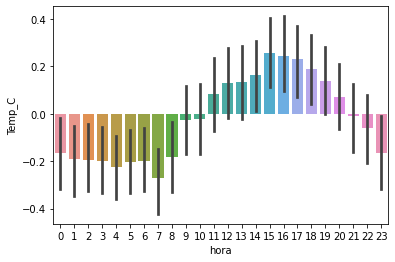

In [21]:
sns.barplot(df_final['hora'],df_final['Temp_C']);

Dividimos el días en franjas horarias según la temperatura

0: 0,1,2,3,4,5,6,7,8,23

1: 9,10,21,22

2: 11,12,13,14,19,20

3: 15,16,17,18

In [22]:
df_final.hora.unique()

array([16,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       17, 20, 21, 22, 23,  0,  1])

In [23]:
#mapa = {0:0, 0:1, 0:2, 0:3, 0:4, 0:5, 0:6, 0:7, 0:8, 0:23, 1:9, 1:10, 1:21, 1:22, 2: 11, 2:12, 2:13, 2:14, 2:19, 2:20, 3:15, 3:16, 3:17, 3:18}

In [25]:
mapa = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 23:0, 9:1, 10:1, 21:1, 22:1, 11:2, 12:2, 13:2, 14:2, 19:2, 20:2, 15:3, 16:3, 17:3, 18:3}

In [26]:
df_final["hora"] = df_final["hora"].map(mapa)

In [27]:
df_final["hora"]

0       3
1       0
2       0
3       0
4       0
       ..
4170    2
4171    1
4172    1
4173    0
4174    0
Name: hora, Length: 4175, dtype: int64

Encoding de la columna mes

In [ ]:
sns.barplot(df_final['mes'],df_final['Temp_C']);

Dividimos los meses en categorías según la temperatura

0: 1,2,11,12

1: 3,4,10

2: 5,9

3: 6,7, 8

In [28]:
mapa2 = {1:0, 2:0, 11:0, 12:0, 3:1, 4:1, 10:1, 5:2, 9:2, 6:3, 7:3, 8:3}

In [29]:
df_final["mes"] = df_final["mes"].map(mapa2)

In [30]:
df_final

,index,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Mainly Clear,Weather_Mostly Cloudy,mes,hora
0,16,2012-01-01 16:00:00,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.782197,0,1,0,3
1,26,2012-01-02 02:00:00,-0.645784,-0.430150,0.616199,2.334455,-0.673565,0.024563,0,1,0,0
2,27,2012-01-02 03:00:00,-0.662611,-0.484338,0.488112,2.467921,-0.673565,0.024563,0,1,0,0
3,28,2012-01-02 04:00:00,-0.729921,-0.556589,0.488112,2.334455,-0.673565,0.024563,0,1,0,0
4,29,2012-01-02 05:00:00,-0.755162,-0.556589,0.552155,2.334455,-0.673565,0.024563,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4170,8755,2012-12-30 19:00:00,-2.101351,-1.839042,1.000461,1.533659,-0.673565,0.517316,1,0,0,2
4171,8757,2012-12-30 21:00:00,-2.135006,-1.839042,1.192591,0.732864,-0.673565,0.562112,1,0,0,1
4172,8758,2012-12-30 22:00:00,-2.126592,-1.820979,1.256635,0.599398,-0.673565,0.621840,1,0,0,1
4173,8759,2012-12-30 23:00:00,-1.991973,-1.712603,1.064504,1.800591,-0.673565,0.591976,0,1,0,0


In [32]:
df_final.drop(["index", "Date/Time", "Weather_Mostly Cloudy"], axis=1, inplace = True)

In [33]:
df_final.head(1)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Mainly Clear,mes,hora
0,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.782197,0,0,3


In [34]:
df_final.to_csv("./Datos/tiempo_esta_cod.csv")

Codificación con datos sin estandarizar y codificadas

In [35]:
df_final3 = pd.concat([df_encoded, numericas], axis = 1)
df_final3.head()

,Weather_Mainly Clear,Weather_Mostly Cloudy,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,0,1,2.6,-0.2,82,13,12.9,99.93
1,0,1,3.9,-0.9,71,32,25.0,101.14
2,0,1,3.7,-1.5,69,33,25.0,101.14
3,0,1,2.9,-2.3,69,32,25.0,101.14
4,0,1,2.6,-2.3,70,32,25.0,101.14


In [36]:
df_final3.drop(["Weather_Mostly Cloudy"], axis=1, inplace = True)

In [37]:
df_final3.to_csv("./Datos/tiempo_sin_esta_cod.csv")